In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [30]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
df=pd.read_csv(r"country_vaccinations.csv")


In [31]:
df.fillna(0, inplace = True)
df['iso_code'].fillna('GBR', inplace=True)
df.drop(df.index[df['iso_code'] == 0], inplace = True)
df.drop(["source_name","source_website","people_fully_vaccinated","daily_vaccinations_raw","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million","people_vaccinated_per_hundred"],axis=1, inplace=True)

In [32]:
df_India = df[(df['country']=='India') | (df['country']=='Wales')| (df['country']=='Albania')].copy()
#df_India = df
df_India.drop(['people_vaccinated'], axis = 1, inplace = True)
df_India.drop(['total_vaccinations'], axis = 1, inplace = True)
df_India.drop(['vaccines'], axis = 1, inplace = True)
df_India.drop(['total_vaccinations_per_hundred'], axis = 1, inplace = True)
df_India.drop(['iso_code'], axis = 1, inplace = True)
#df_India.drop(['country'], axis = 1, inplace = True)
df_India

,country,date,daily_vaccinations
0,Albania,2021-01-10,0.0
1,Albania,2021-01-11,64.0
2,Albania,2021-01-12,64.0
3,Albania,2021-01-13,63.0
4,Albania,2021-01-14,66.0
...,...,...,...
1586,India,2021-02-16,341096.0
1587,India,2021-02-17,343588.0
1588,India,2021-02-18,383285.0
1589,India,2021-02-19,392508.0


In [33]:
df_India.insert(0, 'New_ID', range(1, 1 + len(df_India)))
df_India.drop(['date'], axis = 1, inplace = True)
df_India["New_ID"] = pd.to_numeric(df_India["New_ID"], downcast="float")
X = df_India.iloc[:-1].values
y = df_India.iloc[:-1,-1].values

In [34]:
print(X)

[[1.0 'Albania' 0.0]
 [2.0 'Albania' 64.0]
 [3.0 'Albania' 64.0]
 [4.0 'Albania' 63.0]
 [5.0 'Albania' 66.0]
 [6.0 'Albania' 62.0]
 [7.0 'Albania' 62.0]
 [8.0 'Albania' 58.0]
 [9.0 'Albania' 55.0]
 [10.0 'Albania' 51.0]
 [11.0 'Albania' 47.0]
 [12.0 'Albania' 40.0]
 [13.0 'Albania' 34.0]
 [14.0 'Albania' 26.0]
 [15.0 'Albania' 21.0]
 [16.0 'Albania' 15.0]
 [17.0 'Albania' 9.0]
 [18.0 'Albania' 4.0]
 [19.0 'Albania' 0.0]
 [20.0 'Albania' 0.0]
 [21.0 'Albania' 0.0]
 [22.0 'Albania' 0.0]
 [23.0 'Albania' 0.0]
 [24.0 'Albania' 0.0]
 [25.0 'Albania' 12.0]
 [26.0 'Albania' 24.0]
 [27.0 'Albania' 35.0]
 [28.0 'Albania' 47.0]
 [29.0 'Albania' 59.0]
 [30.0 'Albania' 71.0]
 [31.0 'Albania' 82.0]
 [32.0 'Albania' 81.0]
 [33.0 'Albania' 79.0]
 [34.0 'Albania' 78.0]
 [35.0 'Albania' 76.0]
 [36.0 'Albania' 75.0]
 [37.0 'Albania' 73.0]
 [38.0 'Albania' 72.0]
 [39.0 'Albania' 72.0]
 [40.0 'Albania' 254.0]
 [41.0 'India' 0.0]
 [42.0 'India' 191181.0]
 [43.0 'India' 112150.0]
 [44.0 'India' 151350.0]
 [

In [35]:
#df_India['iso_code'] = df_India['iso_code'].replace(['IND'],1.0)
#df_India['iso_code'] = df_India['iso_code'].replace(['USA'],2.0)
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df_India['country'] = number.fit_transform(df_India['country'].astype('str'))
df_India

,New_ID,country,daily_vaccinations
0,1.0,0,0.0
1,2.0,0,64.0
2,3.0,0,64.0
3,4.0,0,63.0
4,5.0,0,66.0
...,...,...,...
1586,73.0,1,341096.0
1587,74.0,1,343588.0
1588,75.0,1,383285.0
1589,76.0,1,392508.0


In [36]:
df_India['country'] = pd.to_numeric(df_India['country'], downcast="float")
df_India

,New_ID,country,daily_vaccinations
0,1.0,0.0,0.0
1,2.0,0.0,64.0
2,3.0,0.0,64.0
3,4.0,0.0,63.0
4,5.0,0.0,66.0
...,...,...,...
1586,73.0,1.0,341096.0
1587,74.0,1.0,343588.0
1588,75.0,1.0,383285.0
1589,76.0,1.0,392508.0


In [37]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 1590
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   New_ID              77 non-null     float32
 1   country             77 non-null     float32
 2   daily_vaccinations  77 non-null     float64
dtypes: float32(2), float64(1)
memory usage: 1.8 KB


In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
#df_India=np.array(ct.fit_transform(df_India))

In [39]:
print(df_India)

      New_ID  country  daily_vaccinations
0        1.0      0.0                 0.0
1        2.0      0.0                64.0
2        3.0      0.0                64.0
3        4.0      0.0                63.0
4        5.0      0.0                66.0
...      ...      ...                 ...
1586    73.0      1.0            341096.0
1587    74.0      1.0            343588.0
1588    75.0      1.0            383285.0
1589    76.0      1.0            392508.0
1590    77.0      1.0            403045.0

[77 rows x 3 columns]


In [40]:
print(X)

[[1.0 0.0 1.0 0.0]
 [1.0 0.0 2.0 64.0]
 [1.0 0.0 3.0 64.0]
 [1.0 0.0 4.0 63.0]
 [1.0 0.0 5.0 66.0]
 [1.0 0.0 6.0 62.0]
 [1.0 0.0 7.0 62.0]
 [1.0 0.0 8.0 58.0]
 [1.0 0.0 9.0 55.0]
 [1.0 0.0 10.0 51.0]
 [1.0 0.0 11.0 47.0]
 [1.0 0.0 12.0 40.0]
 [1.0 0.0 13.0 34.0]
 [1.0 0.0 14.0 26.0]
 [1.0 0.0 15.0 21.0]
 [1.0 0.0 16.0 15.0]
 [1.0 0.0 17.0 9.0]
 [1.0 0.0 18.0 4.0]
 [1.0 0.0 19.0 0.0]
 [1.0 0.0 20.0 0.0]
 [1.0 0.0 21.0 0.0]
 [1.0 0.0 22.0 0.0]
 [1.0 0.0 23.0 0.0]
 [1.0 0.0 24.0 0.0]
 [1.0 0.0 25.0 12.0]
 [1.0 0.0 26.0 24.0]
 [1.0 0.0 27.0 35.0]
 [1.0 0.0 28.0 47.0]
 [1.0 0.0 29.0 59.0]
 [1.0 0.0 30.0 71.0]
 [1.0 0.0 31.0 82.0]
 [1.0 0.0 32.0 81.0]
 [1.0 0.0 33.0 79.0]
 [1.0 0.0 34.0 78.0]
 [1.0 0.0 35.0 76.0]
 [1.0 0.0 36.0 75.0]
 [1.0 0.0 37.0 73.0]
 [1.0 0.0 38.0 72.0]
 [1.0 0.0 39.0 72.0]
 [1.0 0.0 40.0 254.0]
 [0.0 1.0 41.0 0.0]
 [0.0 1.0 42.0 191181.0]
 [0.0 1.0 43.0 112150.0]
 [0.0 1.0 44.0 151350.0]
 [0.0 1.0 45.0 168709.0]
 [0.0 1.0 46.0 161297.0]
 [0.0 1.0 47.0 173922.0]
 [0.0 1

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## 1. INDIA

In [43]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [44]:
print(y_test)
print(y_pred)

[2.21356e+05 2.75192e+05 0.00000e+00 3.92508e+05 5.90000e+01 3.50000e+01
 3.51688e+05 3.01348e+05 7.60000e+01 5.80000e+01 1.51350e+05 2.99082e+05
 1.91181e+05 0.00000e+00 7.80000e+01 3.64400e+05]
[ 2.21356000e+05  2.75192000e+05  4.14675828e-11  3.92508000e+05
  5.90000000e+01  3.50000000e+01  3.51688000e+05  3.01348000e+05
  7.60000000e+01  5.80000000e+01  1.51350000e+05  2.99082000e+05
  1.91181000e+05 -2.29215132e-10  7.80000000e+01  3.64400000e+05]


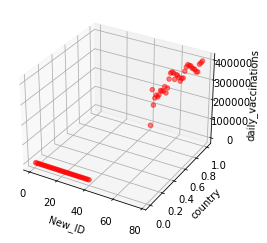

In [45]:
# Visualize the Data for Multiple Linear Regression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_India['New_ID'],df_India['country'],df_India['daily_vaccinations'],c='red', marker='o', alpha=0.5)
#ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('New_ID')
ax.set_ylabel('country')
ax.set_zlabel('daily_vaccinations')
plt.show()

In [46]:
model = LinearRegression()
model.fit(X_train,y_train)
accuracy = regressor.score(X_test,y_test)
print(accuracy*100)
y_pred = regressor.predict(X_test)

100.0


In [47]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: \n', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))

Coefficients: 
 [ 1.29402891e-10 -1.29403164e-10 -6.59814426e-13  1.00000000e+00]
Mean squared error: 0.00
Variance score: 1.00


In [48]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

r2 = r2_score(y_test,y_pred)
print('r2 score for a model which predicts mean value always is', r2)

Root Mean Square Error:

8.014903341218422e-11
r2 score for a model which predicts mean value always is 1.0


In [49]:
import math
from sklearn.metrics import r2_score

MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

r2 = r2_score(y_test,y_pred)
print('r2 score for a model which predicts mean value always is', r2)

Root Mean Square Error:

8.014903341218422e-11
r2 score for a model which predicts mean value always is 1.0
